In [ ]:
"""
- VGG19 Siamese Network for the problem of classification and differenciating
    - full dataset Cifar10
    - smaller dataset - subset od Cifar10 
"""

In [1]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import *
import random

#import ../utils.py
import sys
sys.path.append('../')
from utils import *

In [2]:
def build_model(weight_decay= 0.0005, x_shape=[32,32,3], num_classes=10):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

    model = Sequential()
#     model.add(Input(shape=()))

    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
Y_test = y_test

num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 

In [4]:
model = build_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

history3 = model.fit(x_train, y_train, epochs=400, batch_size=512, shuffle=True,
         validation_data=(x_test, y_test),callbacks=[callback])


Epoch 1/400
98/98 [==============================] - 15s 99ms/step - loss: 4.7229 - accuracy: 0.1932 - val_loss: 5.1471 - val_accuracy: 0.1000
Epoch 2/400
98/98 [==============================] - 7s 72ms/step - loss: 3.9134 - accuracy: 0.3702 - val_loss: 4.9119 - val_accuracy: 0.1000
Epoch 3/400
98/98 [==============================] - 7s 72ms/step - loss: 3.3773 - accuracy: 0.4843 - val_loss: 4.1360 - val_accuracy: 0.2027
Epoch 4/400
98/98 [==============================] - 7s 72ms/step - loss: 2.9357 - accuracy: 0.5629 - val_loss: 3.7841 - val_accuracy: 0.2011
Epoch 5/400
98/98 [==============================] - 7s 72ms/step - loss: 2.5644 - accuracy: 0.6230 - val_loss: 3.7787 - val_accuracy: 0.2831
Epoch 6/400
98/98 [==============================] - 7s 72ms/step - loss: 2.2551 - accuracy: 0.6698 - val_loss: 2.5647 - val_accuracy: 0.5457
Epoch 7/400
98/98 [==============================] - 7s 72ms/step - loss: 1.9860 - accuracy: 0.7128 - val_loss: 2.0084 - val_accuracy: 0.6752
Epoch

In [7]:


print('Saving model')
model.save(r'cifar_vgg/models/Cifar10-vgg-84%50epoch.h5')

Saving model


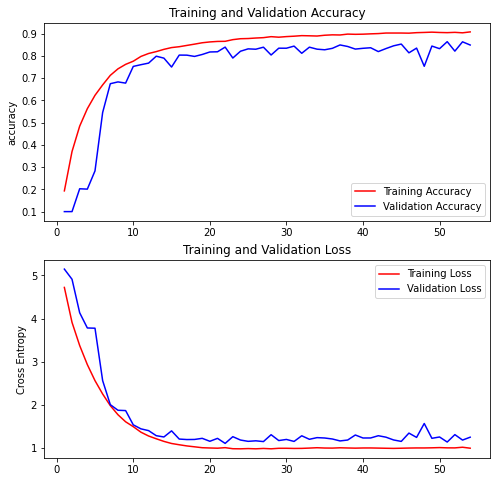

In [19]:
%matplotlib inline
from utils import print_history_chart
print_history_chart(history3)

In [6]:
model = tf.keras.models.load_model(r"cifar_vgg/models/Cifar10-vgg-84%50epoch.h5")

results = full_evaluate(model, x_test, Y_test)

print()

results = full_evaluate_differencing(model, x_test, Y_test) # id11


accuracy_score: 0.8492
f1_score_macro: 0.8492382973390467
f1_score_weighted: 0.8491617026609534

Accuracy: 0.9446899999999999
Confusion matrix:
 [[8733  275]
 [ 242  750]]
F1-score: 0.7436787307882995


# Smaller dataset

In [8]:
def reduce(dataset):
    return dataset[:int(dataset.shape[0]/2)]

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = reduce(x_train)
y_train = reduce(y_train)
x_test = reduce(x_test)
y_test = reduce(y_test)

Y_test = y_test

num_classes = 10 
x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 

In [4]:
model = build_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

history3 = model.fit(x_train, y_train, epochs=400, batch_size=512, shuffle=True,
         validation_data=(x_test, y_test),callbacks=[callback])


Epoch 1/400
49/49 [==============================] - 12s 137ms/step - loss: 5.1442 - accuracy: 0.1452 - val_loss: 5.3114 - val_accuracy: 0.1014
Epoch 2/400
49/49 [==============================] - 4s 72ms/step - loss: 4.5115 - accuracy: 0.2299 - val_loss: 5.7400 - val_accuracy: 0.0982
Epoch 3/400
49/49 [==============================] - 4s 72ms/step - loss: 4.1414 - accuracy: 0.2972 - val_loss: 5.0257 - val_accuracy: 0.0982
Epoch 4/400
49/49 [==============================] - 4s 72ms/step - loss: 3.8188 - accuracy: 0.3725 - val_loss: 13.3954 - val_accuracy: 0.1008
Epoch 5/400
49/49 [==============================] - 4s 72ms/step - loss: 3.5593 - accuracy: 0.4329 - val_loss: 4.7955 - val_accuracy: 0.1032
Epoch 6/400
49/49 [==============================] - 4s 72ms/step - loss: 3.3012 - accuracy: 0.4964 - val_loss: 5.2940 - val_accuracy: 0.1598
Epoch 7/400
49/49 [==============================] - 4s 72ms/step - loss: 3.0617 - accuracy: 0.5413 - val_loss: 4.4150 - val_accuracy: 0.1128
Epo

In [6]:
print('Saving model')
model.save('cifar_vgg/models/Cifar10-vgg-small.h5')

Saving model


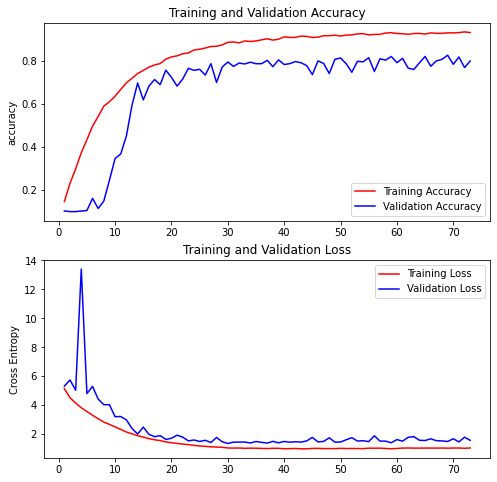

In [7]:
%matplotlib inline
from utils import print_history_chart
print_history_chart(history3)

In [9]:
model = tf.keras.models.load_model("cifar_vgg/models/Cifar10-vgg-small.h5")

results = full_evaluate(model, x_test, Y_test) # id12

print()



accuracy_score: 0.7998
f1_score_macro: 0.7980343514799062
f1_score_weighted: 0.8012082050457029

Accuracy: 0.9315200000000001
Confusion matrix:
 [[4360  169]
 [ 146  325]]
F1-score: 0.6735751295336787
